<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Referral patterns of Indigenous children to ear, nose & throat specialist health services in the Hunter New England health district (2017 - 2021)

### Context

Approximately 30% of urban Aboriginal and Torres Strait Islander children experience persistent middle ear infection or otitis media in early childhood. Although these ear health problems are often established within the first 2 years of life, many children do not receive effective remediation of hearing impairment until
4–5 years of age. Because of the role of hearing in early language, cognitive and psychosocial development, timely access to ear health and hearing care is critical
for mitigating developmental delay at school entry.6-8 Although Aboriginal families in urban settings might
be expected to have easy access to ear health and hearing care, difficulties with access to health services are well documented.

This analysis was conducted to explore current referral patterns to specialist ear services in the Hunter New England Health District during the years 2017 - 2021. Providing greater visibility of current referral patterns may reveal insights that can be used to improve health outcomes for indigenous children with chronic ear health problems. 


### Data Description

The dataset ENT_referrals_HNE.xlsx was provided by Hunter New England Health and contains five excel spreadsheets which cover different regions within the Hunter New England health district:

 - Greater Newcastle
 - Lower Hunter
 - Upper Hunter
 - Mid Coast
 - New England

In addition, two excel spreadsheets contain the same data separated into public or private sector referral status.

Each spreadsheet contains referrals from that region, with associated information including referring service, specialist services referred to, whether the referral was processed through the public or private health system, condition urgency and symptomatic description. 

### Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Referral ID              | alphanumeric ID string
| Referral Date            | date of referral
| Status                   | Current state of referral
| Clinical Area            | The type of clinical condition in the referral | ENT = Ear, nose, throat |          
| Service Description      | The specific symptoms observed leading to referral
| Gp Urgency               | The severity of the health condition
| Referral To              | Public or private sector referral
| Refer to Service Name    | Specialist service name
| Refer To Address         | Location of specialist service
| Indigenous Status        | Indigenous status of the referred patient
| Practice                 | Referring practice
| Region                   | Region of the Hunter New England health district                                  

## Importing Data and Packages

In [80]:
#Load packages

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

In [81]:
#Load spreadsheets for each region into single dataframe, dropping 'Public' and 'Private' spreadsheets
df = pd.concat(pd.read_excel('/Users/damien/Documents/institute_of_data/projects/ENT_referrals.xlsx', sheet_name=[
    'Greater Newcastle',
    'Lower Hunter',
    'Upper Hunter',
    'Mid Coast',
    'New England']), ignore_index=True)


## Exploring Data Structure

In [82]:
df.head()

,Referral ID,Referral Date,Status,Clinical Area,Service Description,Gp Urgency,Referral To,Refer To Service Name,Refer To Address,Indigenous Status,Practice,Region
0,e5649b608af567cc,2017-09-07,Sent,ENT,Rhinosinusitis,Routine,Public,ENT Department,John Hunter Hospital,NaN,Macquarie Family Practice,Greater Newcastle
1,NaN,2017-09-13,Print Only,ENT,Asymmetrical Sensorineural Hearing Loss,Semi Urgent,Private,ENT Surgery Services,Dr Peter Barrie Private Rooms,NaN,Mayfield Medical Connection,Greater Newcastle
2,fdb7009ce730d3d,2017-09-14,Sent,ENT,Otitis Media with Effusion (Glue Ear),Routine,Public,Community Speech Therapy Greater Newcastle,Community Health,NaN,Hello Health Family Practice,Greater Newcastle
3,91a366634b110bcb,2017-09-19,Sent,ENT,Tonsillitis and sore throat,Routine,Public,ENT Department,John Hunter Hospital,NaN,Waratah General Practice,Greater Newcastle
4,931c6f99e9196f5f,2017-10-04,Sent,ENT,Tonsillitis and sore throat,Routine,Public,ENT Department,John Hunter Hospital,NaN,Macquarie Family Practice,Greater Newcastle


In [83]:
df.tail()

,Referral ID,Referral Date,Status,Clinical Area,Service Description,Gp Urgency,Referral To,Refer To Service Name,Refer To Address,Indigenous Status,Practice,Region
2218,3ea0b2b1254b860a,2021-10-13,Sent,ENT,Tonsillitis and Sore Throat,Non Urgent,Public,ENT Department,John Hunter Hospital,Neither Aboriginal nor Torres Strait Islander,Barton Lane Practice Tamworth,New England
2219,c251756966f9a47a,2021-10-25,Sent,ENT,Ear Discharge,Non Urgent,Public,ENT Department,John Hunter Hospital,Neither Aboriginal nor Torres Strait Islander,Windmill Practice,New England
2220,bf59f49b8dbaaeaf,2021-10-25,Sent,ENT,Nasal Fracture,Urgent,Public,ENT Department,John Hunter Hospital,Other,Inverell Medical Centre,New England
2221,e345ef6442a8f260,2021-10-27,Sent,ENT,Nasal Fracture,Urgent,Public,ENT Department,John Hunter Hospital,Aboriginal but not Torres Strait Islander,Inverell Medical Centre,New England
2222,e4108221884fff4f,2021-11-05,Sent,ENT,Otitis Media with Effusion (Glue Ear),Non Urgent,Public,ENT Department,John Hunter Hospital,Neither Aboriginal nor Torres Strait Islander,Windmill Practice,New England


In [84]:
rows, cols = df.shape
print('Number of rows:', rows)
print('Number of columns:', cols)

Number of rows: 2223
Number of columns: 12


In [85]:
print('Number of duplicates:', df.duplicated().sum())

Number of duplicates: 0


In [86]:
# All data are objects (categorical) aside from referral date, which is datetime.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Referral ID            2071 non-null   object        
 1   Referral Date          2223 non-null   datetime64[ns]
 2   Status                 2223 non-null   object        
 3   Clinical Area          2223 non-null   object        
 4   Service Description    2223 non-null   object        
 5   Gp Urgency             2223 non-null   object        
 6   Referral To            2223 non-null   object        
 7   Refer To Service Name  2223 non-null   object        
 8   Refer To Address       2223 non-null   object        
 9   Indigenous Status      2021 non-null   object        
 10  Practice               2223 non-null   object        
 11  Region                 2223 non-null   object        
dtypes: datetime64[ns](1), object(11)
memory usage: 208.5+ KB


In [87]:
#Null values present in a few columns, including a key variable for this analysis - Indigenous Status

df.isnull().sum()

Referral ID              152
Referral Date              0
Status                     0
Clinical Area              0
Service Description        0
Gp Urgency                 0
Referral To                0
Refer To Service Name      0
Refer To Address           0
Indigenous Status        202
Practice                   0
Region                     0
dtype: int64

## Data Pre-processing

In [88]:
#Removing Clinical Area column as they are all same value (ENT)

print(df['Clinical Area'].value_counts())

df = df.drop(columns=['Clinical Area'])

ENT    2223
Name: Clinical Area, dtype: int64


In [89]:
#Renaming columns

df.columns = ['referral_id', 
              'referral_date', 
              'status',
              'symptoms',
              'urgency',
              'health_sector',
              'specialist_service_name',
              'specialist_location',
              'indigenous_status',
              'gp_practice',
              'region'
             ]

### Removing Null Values

In [90]:
#There are some missing values in referral ID and indigenous status columns

df.isnull().sum()

referral_id                152
referral_date                0
status                       0
symptoms                     0
urgency                      0
health_sector                0
specialist_service_name      0
specialist_location          0
indigenous_status          202
gp_practice                  0
region                       0
dtype: int64

In [91]:
#Null values are present at a relatively high proportion in one of the columns of most interest to the analysis (indigenous status)

print('Null values of indigenous status percentage of dataset:', np.round((df['indigenous_status'].isnull().sum() / len(df)) * 100), '%')

Null values of indigenous status percentage of dataset: 9.0 %


In [92]:
#There doesn't appear to be any consistent pattern in the null values, meaning they can't be imputed from other datapoints.

df[df.indigenous_status.isnull()].head()

,referral_id,referral_date,status,symptoms,urgency,health_sector,specialist_service_name,specialist_location,indigenous_status,gp_practice,region
0,e5649b608af567cc,2017-09-07,Sent,Rhinosinusitis,Routine,Public,ENT Department,John Hunter Hospital,NaN,Macquarie Family Practice,Greater Newcastle
1,NaN,2017-09-13,Print Only,Asymmetrical Sensorineural Hearing Loss,Semi Urgent,Private,ENT Surgery Services,Dr Peter Barrie Private Rooms,NaN,Mayfield Medical Connection,Greater Newcastle
2,fdb7009ce730d3d,2017-09-14,Sent,Otitis Media with Effusion (Glue Ear),Routine,Public,Community Speech Therapy Greater Newcastle,Community Health,NaN,Hello Health Family Practice,Greater Newcastle
3,91a366634b110bcb,2017-09-19,Sent,Tonsillitis and sore throat,Routine,Public,ENT Department,John Hunter Hospital,NaN,Waratah General Practice,Greater Newcastle
4,931c6f99e9196f5f,2017-10-04,Sent,Tonsillitis and sore throat,Routine,Public,ENT Department,John Hunter Hospital,NaN,Macquarie Family Practice,Greater Newcastle


In [93]:
#There are also some duplicate categories and some non-relevant information in indigenous_status, these will be consolidated into a smaller set of categories

df.indigenous_status.value_counts()

Neither Aboriginal nor Torres Strait Islander    1154
Other                                             535
Aboriginal but not Torres Strait Islander         212
Not Stated                                         75
Non Aboriginal/Torres Strait Islander              13
Aboriginal                                         11
Both Aboriginal and Torres Strait Islander         10
Torres Strait Islander but not Aboriginal           6
Male                                                3
Female                                              2
Name: indigenous_status, dtype: int64

In [94]:
#Instead of imputation, the null values in indigenous status will be filled with 'Not Stated'

df.indigenous_status.fillna('Not Stated', inplace=True)

In [95]:
#Not stated now contains additional 202 entries that were previously null

df.indigenous_status.value_counts()

Neither Aboriginal nor Torres Strait Islander    1154
Other                                             535
Not Stated                                        277
Aboriginal but not Torres Strait Islander         212
Non Aboriginal/Torres Strait Islander              13
Aboriginal                                         11
Both Aboriginal and Torres Strait Islander         10
Torres Strait Islander but not Aboriginal           6
Male                                                3
Female                                              2
Name: indigenous_status, dtype: int64

In [96]:
#Moving onto null values in referral_id, there appears to be an association with status column, can't see any 'Sent' values as in original dataframe

df[df.referral_id.isnull()].head()

,referral_id,referral_date,status,symptoms,urgency,health_sector,specialist_service_name,specialist_location,indigenous_status,gp_practice,region
1,NaN,2017-09-13,Print Only,Asymmetrical Sensorineural Hearing Loss,Semi Urgent,Private,ENT Surgery Services,Dr Peter Barrie Private Rooms,Not Stated,Mayfield Medical Connection,Greater Newcastle
10,NaN,2017-10-31,Print Only,Recurrent Epistaxis in Children,Semi Urgent,Private,ENT Surgery Services,Newcastle Private Hospital,Not Stated,Main Road Medical Services,Greater Newcastle
13,NaN,2017-11-09,Print Only,Otitis Media with Effusion (Glue Ear),Semi Urgent,Private,Audiology Services,East 'n' Holmes Audiology,Not Stated,Fern Bay Medical Centre,Greater Newcastle
103,NaN,2018-09-06,Print Only,Acute Otitis Media in Children,Urgent,Private,ENT Surgery Services,Newcastle Private Hospital,Not Stated,Macquarie Family Practice,Greater Newcastle
104,NaN,2018-09-06,Print Only,Acute Otitis Media in Children,Urgent,Private,ENT Surgery Services,Dr Peter Barrie Private Rooms,Not Stated,Macquarie Family Practice,Greater Newcastle


In [97]:
# Apart from 1 value, cells with no referral ID seem to be print only, open or archived

ref_null = df[df.referral_id.isnull()]
ref_null.status.value_counts()

Print Only    122
Open           25
Archived        4
Sent            1
Name: status, dtype: int64

In [98]:
# Filling null values with a string (no_id)

df.referral_id.fillna('No ID', inplace=True)
df.isnull().sum()

referral_id                0
referral_date              0
status                     0
symptoms                   0
urgency                    0
health_sector              0
specialist_service_name    0
specialist_location        0
indigenous_status          0
gp_practice                0
region                     0
dtype: int64

### Inspecting Categories for Each Feature

In [99]:
# Moving through the features from left to right, starting with urgency

# After consulting with domain knowledge experts, consolidated into two categories (routine, urgent)

df.urgency.value_counts()

Non Urgent     835
Urgent         816
Routine        365
Semi Urgent    163
Very Urgent     44
Name: urgency, dtype: int64

In [100]:
df['urgency'] = df.urgency.str.replace('Non Urgent','Routine')
df['urgency'] = df.urgency.str.replace('Semi Urgent','Urgent')
df['urgency'] = df.urgency.str.replace('Very Urgent','Urgent')

In [101]:
# Onto symptoms - There is a duplicate category for tonsillitis and sore throat

df.symptoms.value_counts()

Other ENT Concern                          421
Tonsillitis and Sore Throat                309
Otitis Media with Effusion (Glue Ear)      192
Asymmetrical Sensorineural Hearing Loss    153
Hoarse Voice (Dysphonia)                   151
Tonsillitis and sore throat                145
Head and Neck                              134
Rhinosinusitis                             113
Ear Discharge                              109
Tinnitus                                    70
Dysphagia                                   63
Ear Anomalies                               56
Neck Lumps in Adults                        53
Acute Otitis Media in Children              52
Recurrent Epistaxis in Children             48
Nasal Fracture                              44
Vertigo                                     42
Thyroid Nodules                             29
Salivary Gland Disorders                    26
Ear Wax                                     13
Name: symptoms, dtype: int64

In [102]:
# Consolidating into a single category

df['symptoms'] = df.symptoms.str.replace('Tonsillitis and sore throat','Tonsillitis and Sore Throat')

In [103]:
# Health sector looks fine

df.health_sector.value_counts()

Public     2068
Private     155
Name: health_sector, dtype: int64

In [104]:
#Looking at specialist services, there could be some overlap and consolidation is possible.

df.specialist_service_name.value_counts()

ENT Department                                       2047
ENT Surgery Services                                  145
Community Speech Therapy Greater Newcastle              8
Gastroenterology Outpatient Department                  6
Child and Family Nursing                                4
Dr Peter Barrie Private Rooms                           4
Neurology Department                                    2
Prof. Paul Walker Paediatric ENT Surgery Services       2
ENT Services                                            2
Audiology Services                                      1
Plastic Surgery                                         1
Outpatient Department - Neurology Clinic                1
Name: specialist_service_name, dtype: int64

In [105]:
# The original dataframe shows that Peter Barrie and Paul Walker work for ENT surgery services, so these data will be consolidated into ENT surgery.

#ENT services will be consolidated into ENT department.

#All neurology clinic datapoints will be consolidated into neurology department.

# Plastic surgery will be consolidated into ENT surgery services

df['specialist_service_name'] = df.specialist_service_name.str.replace('Dr Peter Barrie Private Rooms','ENT Surgery Services')
df['specialist_service_name'] = df.specialist_service_name.str.replace('Prof. Paul Walker Paediatric ENT Surgery Services','ENT Surgery Services')
df['specialist_service_name'] = df.specialist_service_name.str.replace('ENT Services','ENT Department')
df['specialist_service_name'] = df.specialist_service_name.str.replace('Outpatient Department - Neurology Clinic','Neurology Department')
df['specialist_service_name'] = df.specialist_service_name.str.replace('Plastic Surgery','ENT Surgery Services')


In [106]:
# Moving on to specialist location, and again, consolidation and rationalisation is possible. 

# Category names will be shortened and duplicates will be consolidated. 

df.specialist_location.value_counts()

John Hunter Hospital                                   2055
Dr Peter Barrie Private Rooms                            69
Newcastle Private Hospital                               62
Dr Allan Forrest Private Rooms                           11
Dr Allan Forrest - Peel Health Care                       7
Community Health 621 Hunter Street Newcastle              5
Community Health                                          3
East Maitland Community Health Centre                     3
Hunter Children's ENT  - Newcastle Private Hospital       2
Specialist Private Rooms                                  2
East 'n' Holmes Audiology                                 1
Wallsend Community Health Centre                          1
Avery Plastic Surgery                                     1
Cessnock Hospital                                         1
Name: specialist_location, dtype: int64

In [107]:
#Remove apostrophe from Hunter Children's ENT

df['specialist_location'] = df.specialist_location.str.replace(r"[\"\',]", '')

In [108]:
# Community Health refers to the same health centre as 621 Hunter Street (Greater Newcastle)

df[df.specialist_location == 'Community Health']

,referral_id,referral_date,status,symptoms,urgency,health_sector,specialist_service_name,specialist_location,indigenous_status,gp_practice,region
2,fdb7009ce730d3d,2017-09-14,Sent,Otitis Media with Effusion (Glue Ear),Routine,Public,Community Speech Therapy Greater Newcastle,Community Health,Not Stated,Hello Health Family Practice,Greater Newcastle
47,22b651b3f17a78a6,2018-02-09,Sent,Otitis Media with Effusion (Glue Ear),Routine,Public,Community Speech Therapy Greater Newcastle,Community Health,Not Stated,Seaham Surgery,Greater Newcastle
48,dcea93616af3dce,2018-02-09,Sent,Otitis Media with Effusion (Glue Ear),Routine,Public,Community Speech Therapy Greater Newcastle,Community Health,Not Stated,Seaham Surgery,Greater Newcastle


In [109]:
# Consolidating categories

df['specialist_location'] = df.specialist_location.str.replace('John Hunter Hospital','John Hunter Hospital, New Lambton Heights')
df['specialist_location'] = df.specialist_location.str.replace('Dr Peter Barrie Private Rooms','Dr Peter Barrie Private Rooms, Broadmeadow')
df['specialist_location'] = df.specialist_location.str.replace('Hunter Childrens ENT  - Newcastle Private Hospital', 'Newcastle Private Hospital')
df['specialist_location'] = df.specialist_location.str.replace('Newcastle Private Hospital','Newcastle Private Hospital, New Lambton Heights')
df['specialist_location'] = df.specialist_location.str.replace('Dr Allan Forrest - Peel Health Care','Peel Health Care, Tamworth')
df['specialist_location'] = df.specialist_location.str.replace('Dr Allan Forrest Private Rooms','Dr Allan Forrest Private Rooms, Dee Why')
df['specialist_location'] = df.specialist_location.str.replace('Community Health 621 Hunter Street Newcastle','Community Health Hunter Street, Newcastle')
df['specialist_location'] = df.specialist_location.str.replace('East Maitland Community Health Centre','Community Health Centre, East Maitland')
df['specialist_location'] = df.specialist_location.str.replace('East n Holmes Audiology','East n Holmes Audiology, Waratah')
df['specialist_location'] = df.specialist_location.str.replace('Wallsend Community Health Centre','Community Health Centre, Wallsend')
df['specialist_location'] = df.specialist_location.str.replace('Avery Plastic Surgery','Avery Plastic Surgery, Newcastle')
df['specialist_location'] = df.specialist_location.str.replace('Cessnock Hospital','Cessnock Hospital, Cessnock')

In [110]:
# Specialist private rooms has no location associated with it, so will be dropped.

df = df[df['specialist_location'].str.contains('Specialist Private Rooms')==False]

In [111]:
# Community Health has no location associated with it, so will also be dropped.

to_drop = df.index[df.specialist_location == 'Community Health']

df.drop(labels=to_drop, axis=0, inplace=True)

In [112]:
df.specialist_location.value_counts()

John Hunter Hospital, New Lambton Heights          2055
Dr Peter Barrie Private Rooms, Broadmeadow           69
Newcastle Private Hospital, New Lambton Heights      64
Dr Allan Forrest Private Rooms, Dee Why              11
Peel Health Care, Tamworth                            7
Community Health Hunter Street, Newcastle             5
Community Health Centre, East Maitland                3
East n Holmes Audiology, Waratah                      1
Community Health Centre, Wallsend                     1
Avery Plastic Surgery, Newcastle                      1
Cessnock Hospital, Cessnock                           1
Name: specialist_location, dtype: int64

In [113]:
#There are also some duplicate categories and some non-relevant information in indigenous_status, the most important feature. These will be consolidated into a smaller set of categories

#Question: Could this be done more easily using a for loop as below? Can't seem to get it to work

#indigenous = ['Aboriginal but not Torres Strait Islander',
#              'Aboriginal',
#              'Both Aboriginal and Torres Strait Islander', 
#              'Both Indigenous and Torres Strait Islander',
#              'Torres Strait Islander but not Aboriginal',
#              'Torres Strait Islander but not Indigenous',
#             ]

#non_indigenous = ['Neither Aboriginal nor Torres Strait Islander', 
#                  'Non Aboriginal/Torres Strait Islander',
#                  'Other'
#                 ]

#for i in df.iterrows():

#    if df.indigenous_status[i] in indigenous:
#        i = 'Indigenous'
     
#    elif df.indigenous_status[i] in non_indigenous:
#        i = 'Non-indigenous'
       
#    else:
#        i = 'Not Stated'

df['indigenous_status'] = df.indigenous_status.str.replace('Neither Aboriginal nor Torres Strait Islander','Non-indigenous')
df['indigenous_status'] = df.indigenous_status.str.replace('Other','Non-indigenous')
df['indigenous_status'] = df.indigenous_status.str.replace('Aboriginal but not Torres Strait Islander','Indigenous')
df['indigenous_status'] = df.indigenous_status.str.replace('Non Aboriginal/Torres Strait Islander','Non-indigenous')
df['indigenous_status'] = df.indigenous_status.str.replace('Aboriginal','Indigenous')
df['indigenous_status'] = df.indigenous_status.str.replace('Both Aboriginal and Torres Strait Islander','Indigenous')
df['indigenous_status'] = df.indigenous_status.str.replace('Both Indigenous and Torres Strait Islander','Indigenous')
df['indigenous_status'] = df.indigenous_status.str.replace('Torres Strait Islander but not Aboriginal','Indigenous')
df['indigenous_status'] = df.indigenous_status.str.replace('Torres Strait Islander but not Indigenous','Indigenous')
df['indigenous_status'] = df.indigenous_status.str.replace('Male','Not Stated')
df['indigenous_status'] = df.indigenous_status.str.replace('Female','Not Stated')

df.indigenous_status.value_counts()


Non-indigenous    1700
Not Stated         279
Indigenous         239
Name: indigenous_status, dtype: int64

In [114]:
# Onto gp_practice

df.gp_practice.value_counts()

Mayfield Medical Connection      77
Mount Hutton Medical Practice    75
Nelson Plaza Clinic              58
Appletree Family Practice        53
Wollombi Medical Practice        52
                                 ..
Vital Signs Medical Centre        1
Dr Aubrey Yeh Surgery             1
Karuah Medical Centre             1
Old Bar Medical Centre            1
Cardiff General Practice          1
Name: gp_practice, Length: 198, dtype: int64

In [115]:
# Too many categories to go through and consolidate
df.gp_practice.nunique()

198

In [116]:
# Setting datetime column as index

df = df.set_index('referral_date')

In [117]:
# Creating a new df with 'Not Stated' Removed from indigenous status - will use this for comparisons between indigenous/non-indigenous referral patterns

df2 = df[df.indigenous_status.str.contains('Not Stated')==False]

df2.shape

(1939, 10)

In [118]:
# Creating new column in this df with indigenous status encoded as boolean

df2 = df2.astype({'indigenous_status': 'category'})
codes = df2['indigenous_status'].cat.codes
df2['indigenous'] = codes.replace({0:1, 1:0})

In [119]:
# Creating a third and fourth df containing just indigenous or non-indigenous patients

df3 = df2[df2.indigenous == True]
df4 = df2[df2.indigenous != True]

## Exploratory Data Analysis

In [120]:
def annot_countplot(col, data, hue=None, figsize=(5, 6)):
    
    """Create an annotated vertical countplot with percentages of total for each category"""
    
    plt.figure(figsize=figsize)
    
    ax = sns.countplot(x=col, data=data, hue=hue, order=data[col].value_counts().index)
    ax.set(xlabel='', ylabel='Count')
    plt.xticks(rotation=90)

    # add annotations
    for c in ax.containers:
    
        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{h/df.indigenous_status.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    
        ax.bar_label(c, labels=labels, label_type='edge')

    plt.show()

In [121]:
def perc_plot(data, col, hue=None, xlabel=None, ylabel=None, title=None, offset=1.4, figsize=(10, 6), save=False, path=None, title_size=11, xlabel_size=11, ylabel_size=11, xtick_size=11, ytick_size=11, annotation_size=11):
    
    """Creates a horizontal countplot with percentage labels"""

    plt.figure(figsize=figsize)
    plt.xticks(fontsize=xtick_size)
    plt.yticks(fontsize=ytick_size)

    ax = sns.countplot(y=col, data=data, hue=hue, order=data[col].value_counts().index)
    ax.set_title(title, fontsize=title_size)
    ax.set_xlabel(xlabel, fontsize=xlabel_size, labelpad=15)
    ax.set_ylabel(ylabel, fontsize=ylabel_size)
    
    total = len(data[col])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/offset
            ax.annotate(percentage, (x, y), fontsize=annotation_size)
    
    if save == True:
        ax.figure.savefig(path, bbox_inches='tight')

    else:
        plt.show()

In [122]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

In [123]:
def count_plot(data, col, xlabel='', ylabel='', title='', figsize=(10, 6)):
    
    """Creates a horizontal countplot with counts for each categorical"""

    plt.figure(figsize=figsize)
    
    ax = sns.countplot(y=col, data=data, order=data[col].value_counts().index)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.bar_label(ax.containers[0])

    plt.show()

In [124]:
def top_ten_perc(data, col, percentile=0.1):

    """Calculates the number of categories that make up the specified percentile rounded up to 1 decimal place"""
    
    perc = data[col].value_counts() / len(data)
    perc_list = []
    
    for i in perc:
        
        if np.sum(perc_list) < percentile:
            perc_list.append([i])
        
        else:
            perc_list.pop()
            
        sum_ = np.sum(perc_list) * 100

    print('The top', np.round(sum_, 1), '% of data came from', len(perc_list), 'categories')

In [125]:
def top_ten_cat(data, col, no_cats=10):

    """Calculates the top specified number of categories and the percentage of data associated with them, defaulting to top ten categories"""
    
    perc = data[col].value_counts() / len(data)
    perc_list = []
    
    for i in perc:
        
        if len(perc_list) < no_cats:
            perc_list.append([i])
        
        else:
            perc_list
            
        sum_ = np.sum(perc_list) * 100

    print('The top', len(perc_list), 'categories represent', np.round(sum_, 1), '% of the data')

### EDA Question 1: Which region is referring the most patients?

 - 5 regions in the database
 - Greater Newcastle with 65.3% of the total

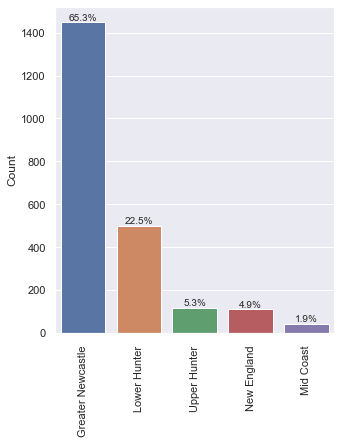

In [126]:
annot_countplot('region', df)

### EDA Question 2: Which service is referring the most patients?

 - 198 referring services in the database
 - The highest number of referrals come from Mayfield Medical Connection, with 3.5% of the total - Approximately the top 10% of referrals come from four practices: Mayfield, Mount Hutton, Nelson Plaza and Appletree Family Practice 

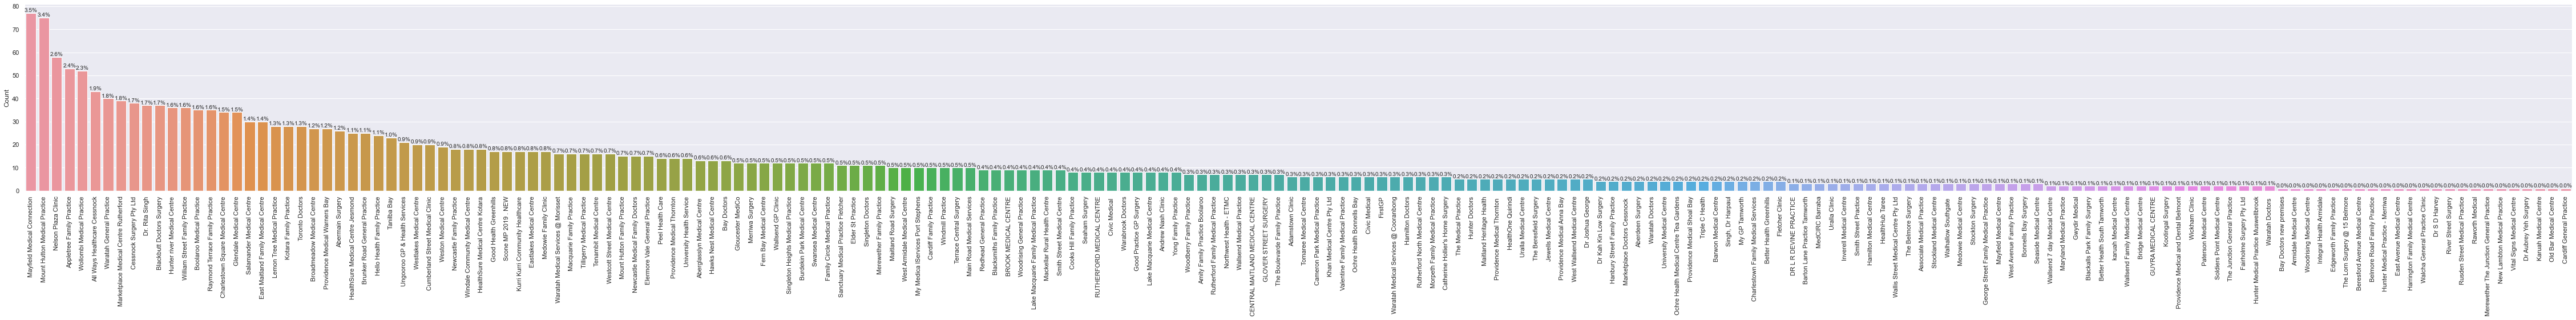

In [127]:
annot_countplot('gp_practice', df, figsize=(80,6))

In [128]:
print(top_ten_perc(data=df, col='gp_practice', percentile=0.1))
print(top_ten_cat(data=df, col='gp_practice', no_cats=10))

The top 10.0 % of data came from 4 categories
None
The top 10 categories represent 23.1 % of the data
None


### EDA Question 3: Which specialist services are patients most referred to?

 - The vast majority of patients are referred to the John Hunter Hospital, with 92.6% of the total
 - The remaining 7.4% is shared between 10 specialist service providers
 

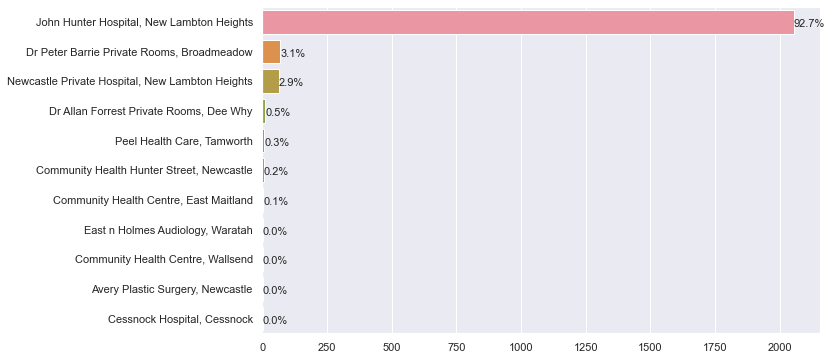

In [129]:
perc_plot(data=df, col='specialist_location')

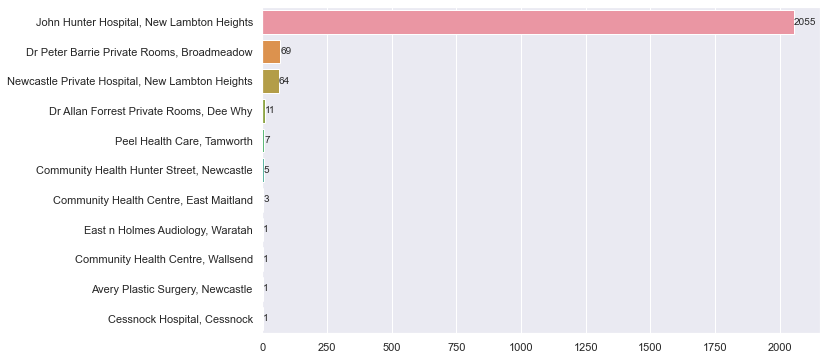

In [130]:
count_plot(data=df, col='specialist_location')

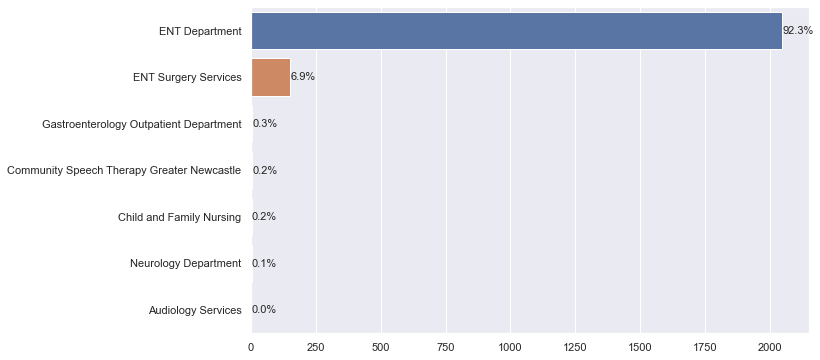

In [131]:
perc_plot(data=df, col='specialist_service_name', offset=1.7)

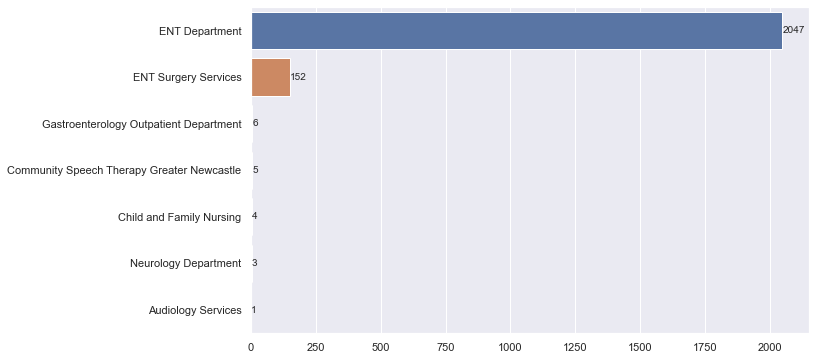

In [132]:
count_plot(data=df, col='specialist_service_name')

### EDA Question 4: What are the main causes for referral?

 - 20.5% of patients are referred for tonsilitis and sore throat
 - The next largest category at 18.9% is 'other ENT concern', without symptoms specified
 - 8.5% of patients are referred for otitis media
 - Together these top 3 categories make up 50% of the data
 
 

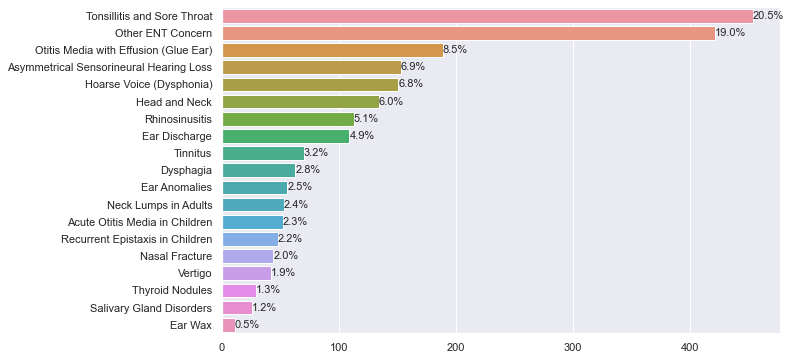

In [133]:
perc_plot(data=df, col='symptoms')

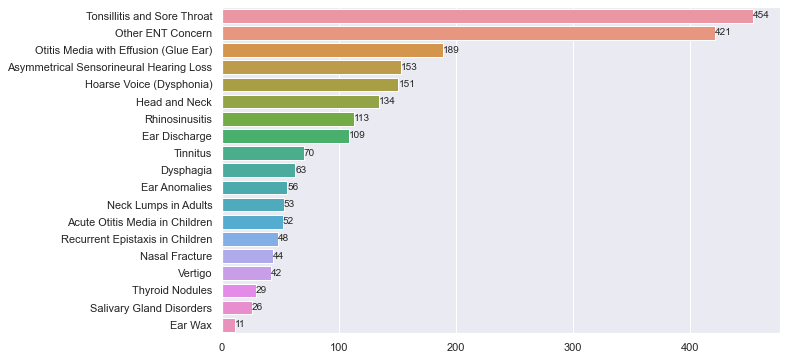

In [134]:
count_plot(data=df, col='symptoms')

In [135]:
print(top_ten_perc(data=df, col='symptoms', percentile=0.1))
print(top_ten_cat(data=df, col='symptoms', no_cats=3))

The top 10.2 % of data came from 3 categories
None
The top 3 categories represent 48.0 % of the data
None


### EDA Question 5: How many referrals are urgent vs routine?

 - 53.9% of referrals are routine, 46.1% are urgent

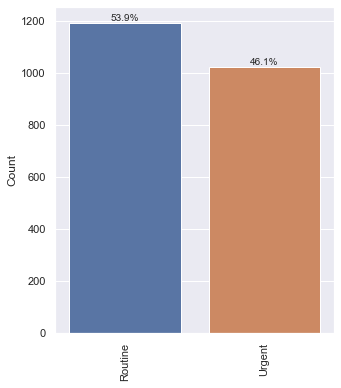

In [136]:
annot_countplot('urgency', df)

### EDA Question 6: How many referrals are processed through the public vs private sector?

 - 93.1% of referrals are processed through the public sector, 6.9% through the private sector

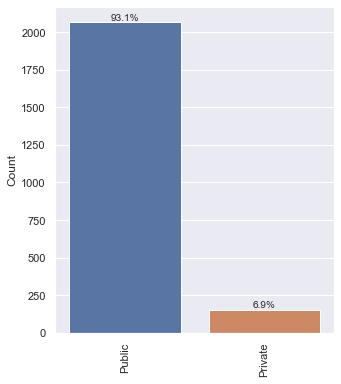

In [137]:
annot_countplot(col='health_sector', data=df)

### EDA Question 7: Have referral patterns changed over time?

 - Referrals have been increasing since 2017, but dipped in Q2 2011 and Q1 2022
 

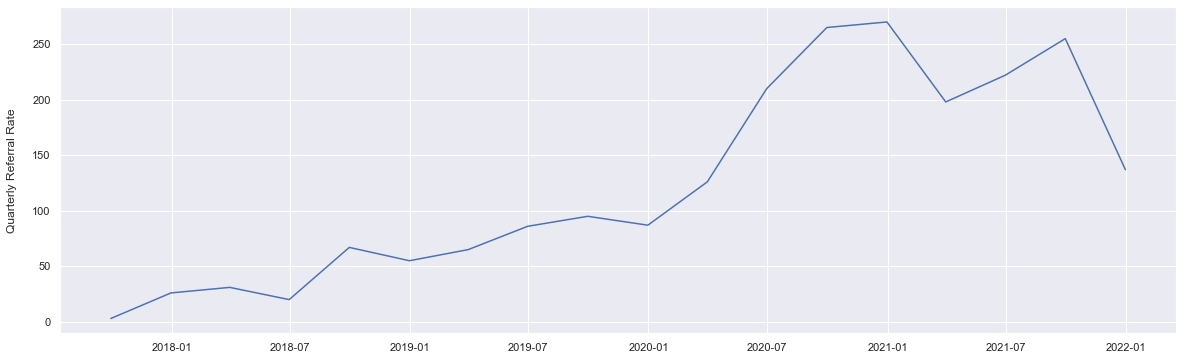

In [138]:
plt.figure(figsize=(20,6))

counts = df.groupby(df.index).size()
resampled = counts.resample("Q").sum()

sns.lineplot(data=resampled)
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Quarterly Referral Rate', labelpad=15)

plt.show()

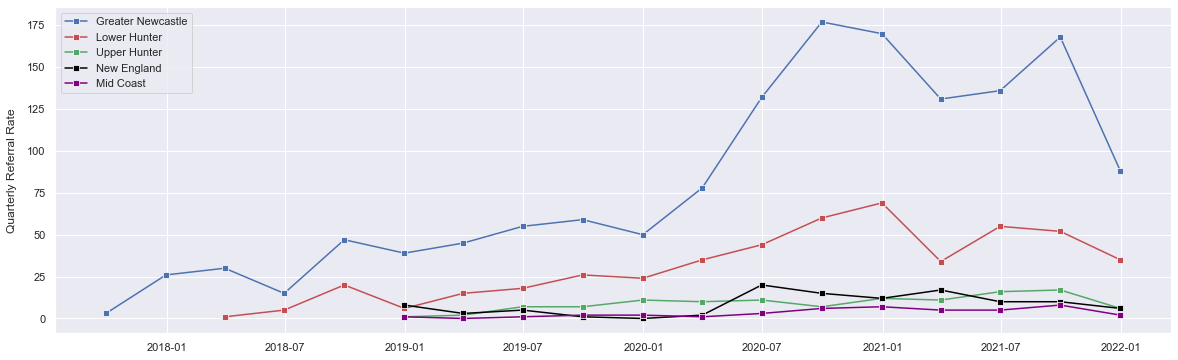

In [139]:
# Surely there is an easier way to do this with a for loop?

newcastle = df[df.region.str.contains('Greater Newcastle')]
lower_hunter = df[df.region.str.contains('Lower Hunter')]
upper_hunter = df[df.region.str.contains('Upper Hunter')]
new_england = df[df.region.str.contains('New England')]
mid_coast = df[df.region.str.contains('Mid Coast')]
plt.figure(figsize=(20,6))

counts_newcastle = newcastle.groupby(newcastle.index).size()
counts_lower = lower_hunter.groupby(lower_hunter.index).size()
counts_upper = upper_hunter.groupby(upper_hunter.index).size()
counts_new_england = new_england.groupby(new_england.index).size()
counts_midcoast = mid_coast.groupby(mid_coast.index).size()

resampled_newcastle= counts_newcastle.resample("Q").sum()
resampled_lower = counts_lower.resample("Q").sum() 
resampled_upper= counts_upper.resample("Q").sum()
resampled_new_england = counts_new_england.resample("Q").sum()
resampled_midcoast = counts_midcoast.resample("Q").sum() 

sns.lineplot(data=resampled_newcastle, color='b', marker='s', label='Greater Newcastle')
sns.lineplot(data=resampled_lower, color='r', marker='s', label='Lower Hunter')
sns.lineplot(data=resampled_upper, color='g', marker='s', label='Upper Hunter')
sns.lineplot(data=resampled_new_england, color='black', marker='s', label='New England')
sns.lineplot(data=resampled_midcoast, color='purple', marker='s', label='Mid Coast')

plt.xlabel('')
plt.ylabel('Quarterly Referral Rate', labelpad=10)

plt.show()

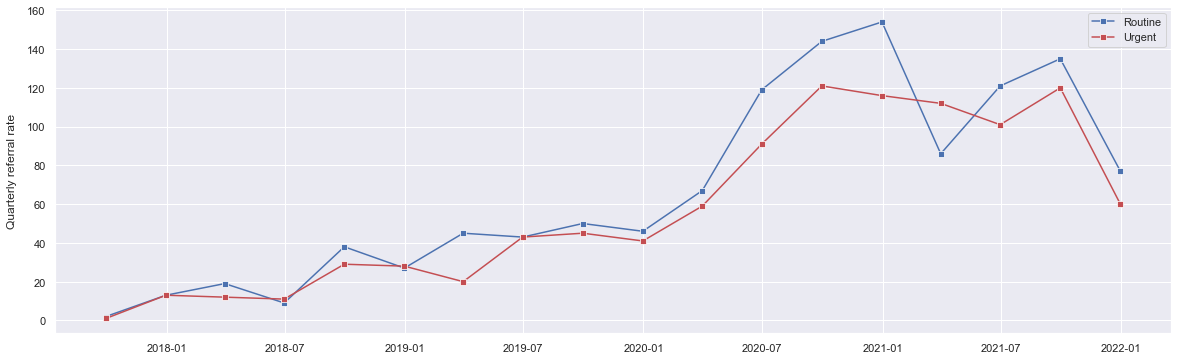

In [140]:
routine = df[df.urgency.str.contains('Routine')]
urgent = df[df.urgency.str.contains('Urgent')]

plt.figure(figsize=(20,6))

counts_routine = routine.groupby(routine.index).size()
counts_urgent = urgent.groupby(urgent.index).size()

resampled_routine = counts_routine.resample("Q").sum()
resampled_urgent = counts_urgent.resample("Q").sum() 

sns.lineplot(data=resampled_routine, color='b', marker='s', label='Routine')
sns.lineplot(data=resampled_urgent, color='r', marker='s', label='Urgent')

plt.xlabel('')
plt.ylabel('Quarterly referral rate', labelpad=10)

plt.show()

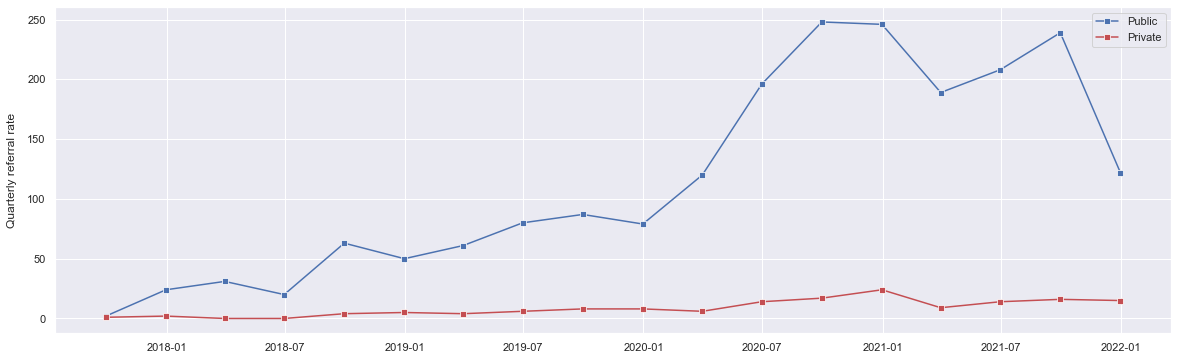

In [141]:
public = df[df.health_sector.str.contains('Public')]
private = df[df.health_sector.str.contains('Private')]

plt.figure(figsize=(20,6))

counts_public = public.groupby(public.index).size()
counts_private = private.groupby(private.index).size()

resampled_public = counts_public.resample("Q").sum()
resampled_private = counts_private.resample("Q").sum() 

sns.lineplot(data=resampled_public, color='b', marker='s', label='Public')
sns.lineplot(data=resampled_private, color='r', marker='s', label='Private')

plt.xlabel('')
plt.ylabel('Quarterly referral rate', labelpad=10)

plt.show()

### EDA Question 8: What percentage of the referrals are for indigenous patients?

 - Where indigenous status is stated, indigenous patients make up 12.3% of the total referrrals, and non-indigenous make up 87.7%

In [142]:
df2.indigenous_status.value_counts()

Non-indigenous    1700
Indigenous         239
Name: indigenous_status, dtype: int64

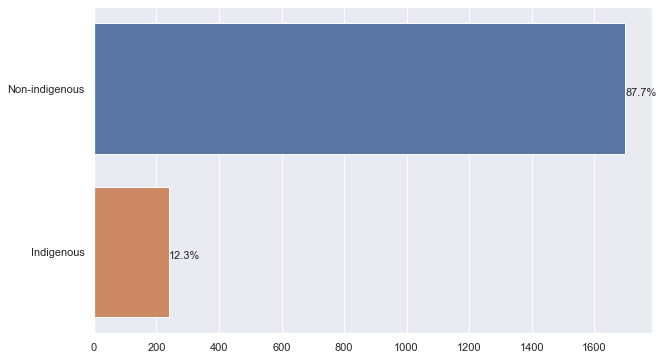

In [143]:
perc_plot(data=df2, col='indigenous_status', offset=1.8)

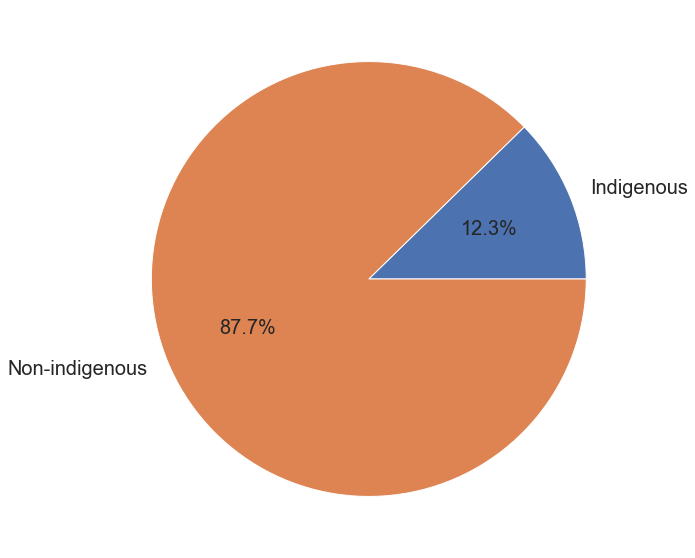

In [144]:
ax = df2.groupby('indigenous_status')['indigenous'].count().plot(kind='pie', figsize=(10,10), fontsize=20, autopct='%1.1f%%')
ax.set_ylabel('')

ax.get_figure().savefig('/Users/damien/Documents/institute_of_data/projects/mini_project_one_figs/pie.png')

### EDA Question 9: Where are the most indigenous patient referrals to/from?

 - The highest number of referrals for indigenous patients comes from Ungooroo GP and Health Services, with 7.9% of dataset
 - 95.4% of indigenous patients were referred to the John Hunter Hospital
 - Indigenous patients are referred at the highest rate from the Upper Hunter (25% of referrals from this region) and New England districts (23% of referrals from this region)
 

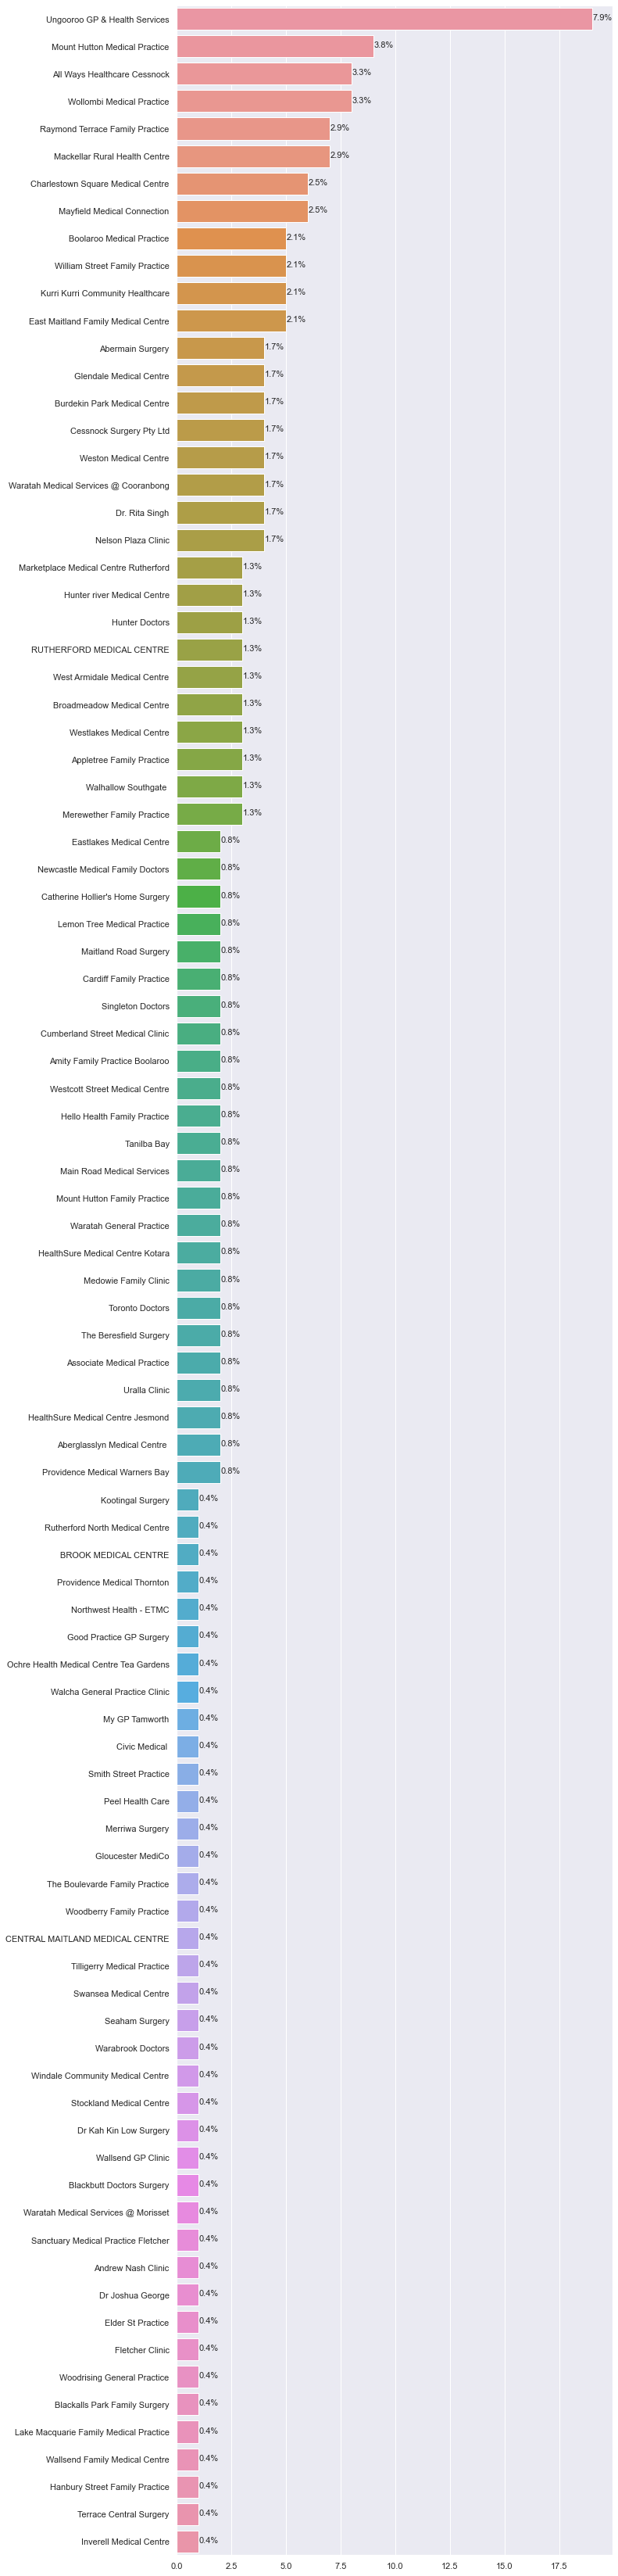

In [145]:
perc_plot(data=df3, col='gp_practice', figsize=(10, 60), offset=1.8)

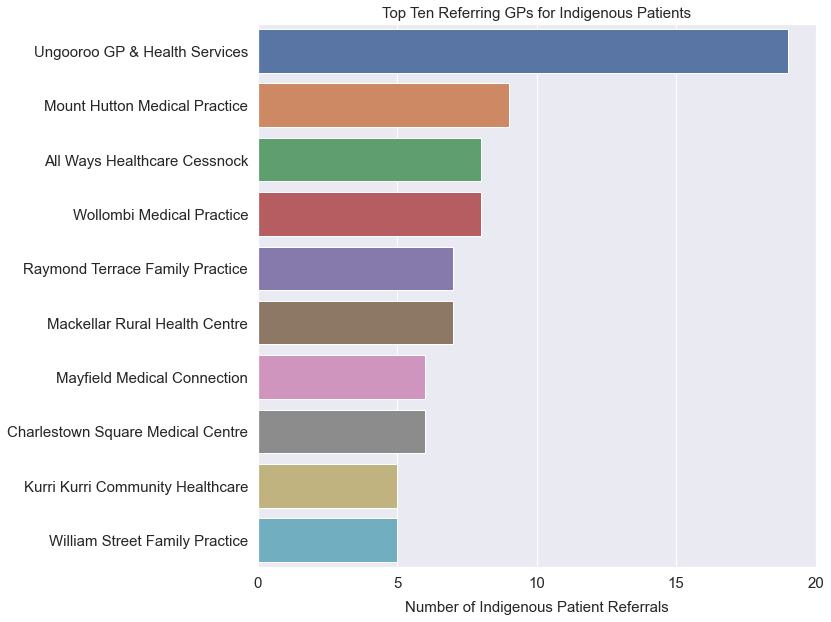

In [146]:
#Top ten referring services

top_ten_gp = df3.groupby('gp_practice').sum().sort_values(by='indigenous', ascending=False).reset_index().truncate(after=9)

plt.figure(figsize=(10,10))

ax = sns.barplot(data=top_ten_gp, y='gp_practice', x='indigenous')
plt.xticks(ticks=[0,5,10,15,20], fontsize=15)
plt.yticks(fontsize=15)
ax.set_title('Top Ten Referring GPs for Indigenous Patients', fontsize=15)
ax.set_xlabel('Number of Indigenous Patient Referrals', labelpad=10, fontsize=15)
ax.set_ylabel(None)
ax.figure.savefig('/Users/damien/Documents/institute_of_data/projects/mini_project_one_figs/gp_practices.svg', bbox_inches='tight')

In [147]:
print(top_ten_perc(data=df3, col='gp_practice'))
print(top_ten_cat(data=df3, col='gp_practice', no_cats=5))

The top 10.0 % of data came from 3 categories
None
The top 5 categories represent 21.3 % of the data
None


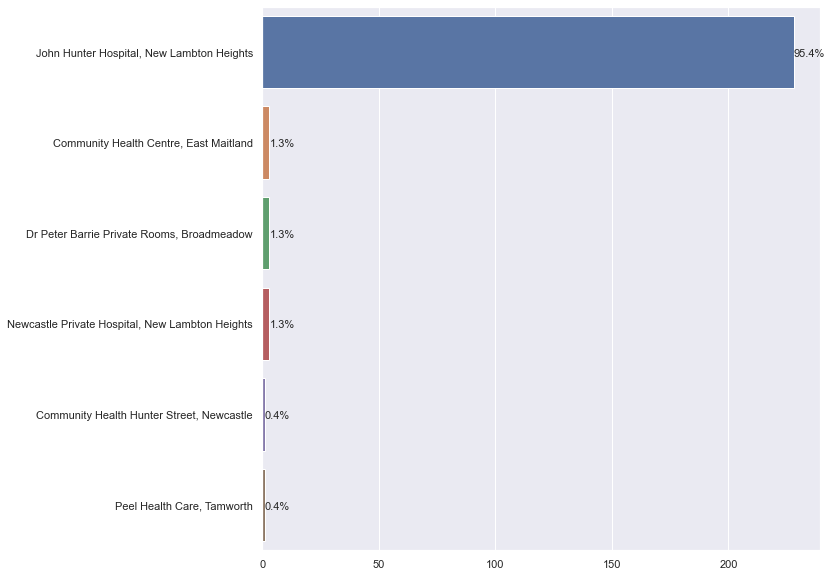

In [148]:
perc_plot(data=df3, col='specialist_location', figsize=(10, 10), offset=1.8)

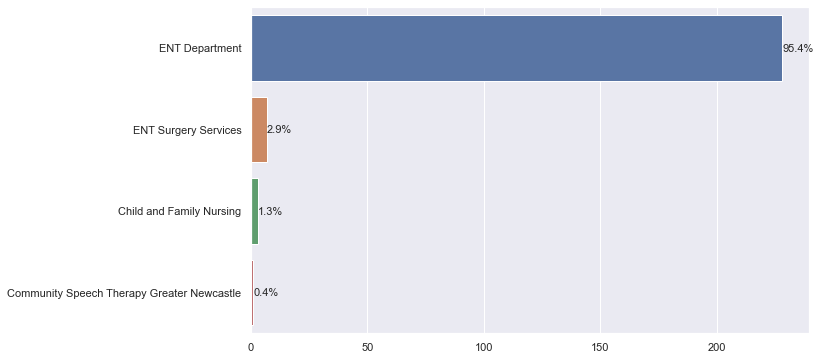

In [149]:
perc_plot(data=df3, col='specialist_service_name', offset=1.8)

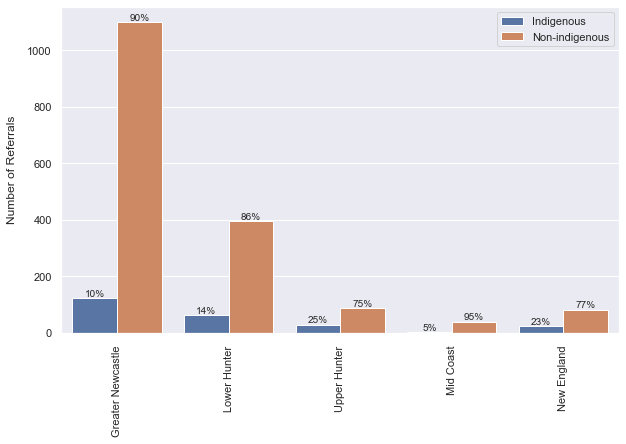

In [150]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)

ax = sns.countplot(x='region', data=df2, hue='indigenous_status')
ax.legend_.set_title(None)
ax.set_xlabel(None)
ax.set_ylabel('Number of Referrals', labelpad=10)

barPerc(df2, 'region', ax)

ax.figure.savefig('/Users/damien/Documents/institute_of_data/projects/mini_project_one_figs/region.svg', bbox_inches='tight')

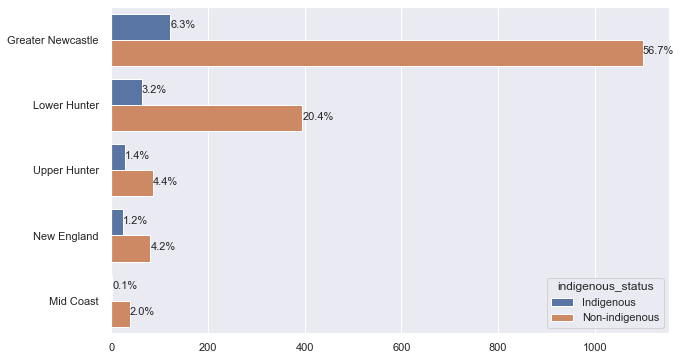

In [151]:
perc_plot(data=df2, col='region', offset=1.8, hue='indigenous_status')

### EDA Question 10: Do Indigenous patient referrals differ in symptomology, health sector or urgency?

- Indigenous patients are primarily present with tonsilitis and sore throat (25.5%). Non-indigenous patients are referred at the highest rate based on 'other ENT concerns' (22%) followed by tonsilitis and sore throat (19.6%).
- Indigenous patients present with more symptoms of ear infection than non-indigenous patients:
  - otitis media with effusion = 2.7x higher rate in population
  - acute otitus media in children = 2.7x higher rate in population
  - ear discharge = 1.6x higher rate in population
- Indigenous patients make up 13% of referrals through the public sector, and only 5% of referrals through the private sector
- Indigenous patients make up 10% of urgent referrals and 14% of routine referrals
 

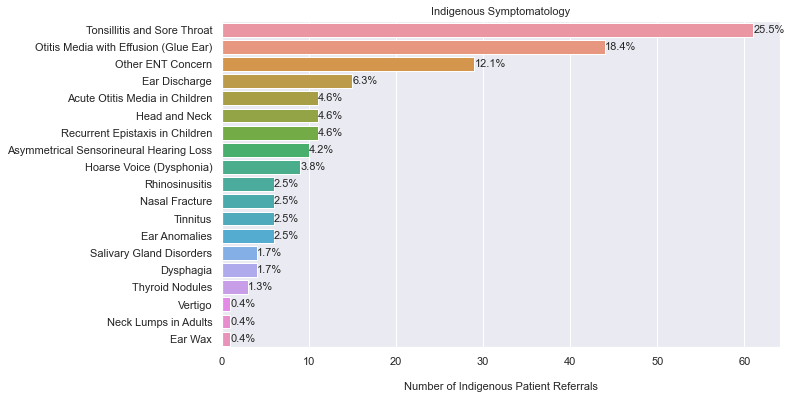

In [152]:
perc_plot(data=df3, col='symptoms', title='Indigenous Symptomatology', xlabel='Number of Indigenous Patient Referrals')


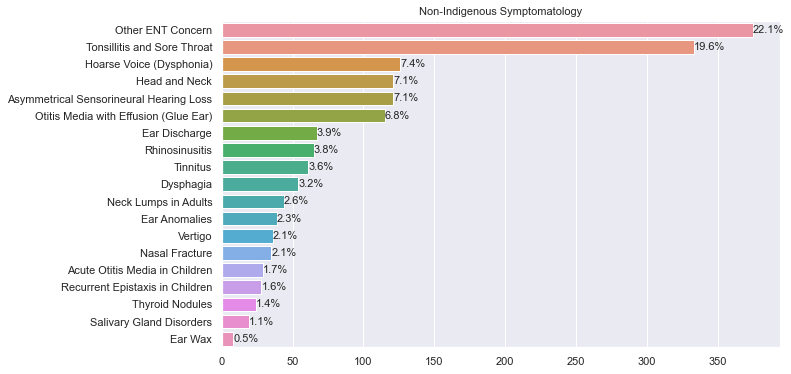

In [153]:
perc_plot(data=df4, col='symptoms', title='Non-Indigenous Symptomatology')

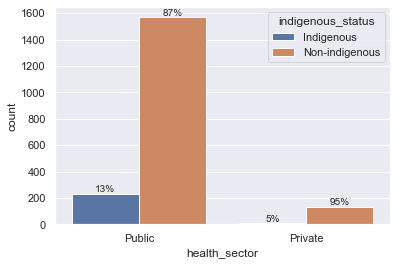

In [154]:
ax = sns.countplot(x='health_sector', data=df2, hue='indigenous_status')

barPerc(df2, 'health_sector', ax)

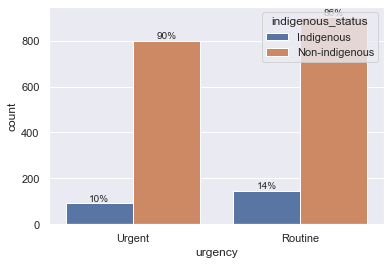

In [155]:
ax = sns.countplot(x='urgency', data=df2, hue='indigenous_status')

barPerc(df2, 'urgency', ax)

### EDA Question 11: Have Indigenous patient referral patterns changed over time?

 - Indigenous referrals make up 18 +/- 10% of total referrals across the timeperiod analysed, but can range as low as 9% (2021 Q2) or as high as 50% (2019 Q1)
 - There was a large increase in non-indigenous referrals during 2020, but no major change in Indigenous referrals

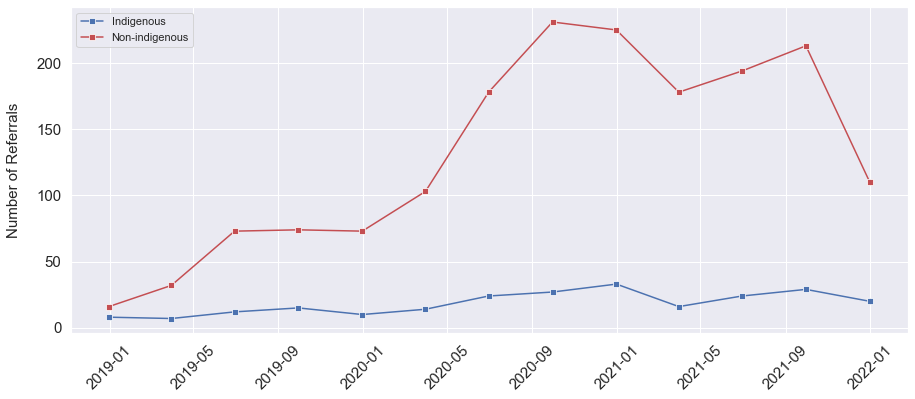

In [156]:
indigenous = df[df.indigenous_status.str.contains('Indigenous')]
non_indigenous = df[df.indigenous_status.str.contains('Non-indigenous')]

plt.figure(figsize=(15,6))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=45)

counts_indigenous = indigenous.groupby(indigenous.index).size()
counts_non_indigenous = non_indigenous.groupby(non_indigenous.index).size()

resampled_indigenous = counts_indigenous.resample("Q").sum()
resampled_non_indigenous = counts_non_indigenous.resample("Q").sum() 

ax = sns.lineplot(data=resampled_indigenous, color='b', marker='s', label='Indigenous')
ax = sns.lineplot(data=resampled_non_indigenous, color='r', marker='s', label='Non-indigenous')
ax.set_xlabel(None)
ax.set_ylabel('Number of Referrals', labelpad=15, fontsize=15)

plt.savefig('/Users/damien/Documents/institute_of_data/projects/mini_project_one_figs/timeseries.svg')

In [157]:
r1 = counts_indigenous.resample("Q").sum()
r2 = counts_non_indigenous.resample("Q").sum() 

resamp_df = pd.concat([r1, r2], axis=1)
resamp_df.columns = ['Indigenous', 'Non-indigenous']
resamp_df['perc'] = (resamp_df['Indigenous'] / resamp_df['Non-indigenous']) *100

resamp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Indigenous,13.0,18.384615,8.421584,7.000000,12.000000,16.00000,24.000000,33.0
Non-indigenous,13.0,130.769231,75.373684,16.000000,73.000000,110.00000,194.000000,231.0
perc,13.0,17.605335,10.352181,8.988764,13.483146,13.69863,18.181818,50.0


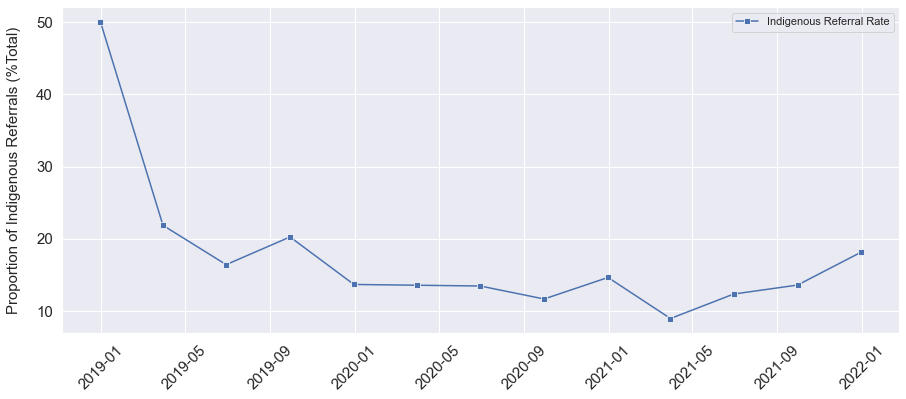

In [158]:
plt.figure(figsize=(15,6))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=45)

ax = sns.lineplot(data=resamp_df.perc, color='b', marker='s', label='Indigenous Referral Rate')
ax.set_xlabel(None)
ax.set_ylabel('Proportion of Indigenous Referrals (%Total)', labelpad=15, fontsize=15)
ax.legend()
plt.savefig('/Users/damien/Documents/institute_of_data/projects/mini_project_one_figs/timeseries_referralrate.svg')

## Mapping Referrals with Folium

In [159]:
import folium
import matplotlib.pylab as pylab

# Cause plots to be displayed in the notebook:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [160]:
loc_df = pd.read_csv('/Users/damien/Documents/institute_of_data/projects/loc_test.csv')

In [161]:
loc_df['count'] = loc_df['count'].astype(float)
loc_df.isnull().sum()

Gp Name    0
lat        0
long       0
count      0
dtype: int64

In [162]:
loc_df.shape

(53, 4)

In [163]:
def generateBaseMap(default_location=[-31.859620437433215, 151.2524791079077], default_zoom_start=8):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )
    
    return base_map

In [164]:
base_map = generateBaseMap(default_location=[-31.859620437433215, 151.2524791079077])
display(base_map)

In [165]:
for i in range(0, len(loc_df)):
    folium.Marker(location=[loc_df.iloc[i]['lat'], loc_df.iloc[i]['long']],
                  popup=(loc_df.iloc[i]['Gp Name'], loc_df.iloc[i]['count'].astype(int64))
                 ).add_to(base_map)
    
display(base_map)

In [166]:
base_map = generateBaseMap(default_location=[-31.859620437433215, 151.2524791079077])

for i in range(0,len(loc_df)):
   folium.Circle(
      location=[loc_df.iloc[i]['lat'], loc_df.iloc[i]['long']],
      popup=[loc_df.iloc[i]['Gp Name'],loc_df.iloc[i]['count'].astype(int64)],
      radius=float(loc_df.iloc[i]['count']*1000),
      color='blue',
      fill=True,
      fill_color='blue'
   ).add_to(base_map)
    
    
base_map

In [167]:
base_map = generateBaseMap(default_location=[-31.859620437433215, 151.2524791079077])

from folium.plugins import HeatMap
loc_df['count'] = 1

loc_df[['lat', 'long', 'count']].groupby(['lat', 'long']).sum().reset_index()

HeatMap(
    data = loc_df[['lat', 'long', 'count']].groupby(['lat', 'long']).sum().reset_index().values.tolist(),
    radius=20,
    max_zoom=13).add_to(base_map)

display(base_map)